  4%|▍         | 1/26 [00:03<01:22,  3.29s/it]INFO:root:
Result exists in ./misc/graphs/statistics/dauntless-planet-621.pdf, skipping...
INFO:root:
Result exists in ./misc/graphs/statistics/bumbling-sun-620.pdf, skipping...
INFO:root:
Result exists in ./misc/graphs/statistics/absurd-silence-615.pdf, skipping...
INFO:root:
Result exists in ./misc/graphs/statistics/vocal-yogurt-618.pdf, skipping...
INFO:root:
Result exists in ./misc/graphs/statistics/AVID(l0246810-11,-adapt)+wgp.pdf, skipping...
INFO:root:
Result exists in ./misc/graphs/statistics/AVID(-adapt,tune_all)+frame_attn.pdf, skipping...
INFO:root:
Result exists in ./misc/graphs/statistics/AVID(tune_all)+frame_attn.pdf, skipping...
INFO:root:
Result exists in ./misc/graphs/statistics/AVID+frame_attn.pdf, skipping...
INFO:root:
Result exists in ./misc/graphs/statistics/neat-grass-612.pdf, skipping...
ERROR:root:Error for 'logs/test/pleasant-waterfall-552/stats_0607T0117_best_video.pickle' -> [Errno 2] No such file or directory: '

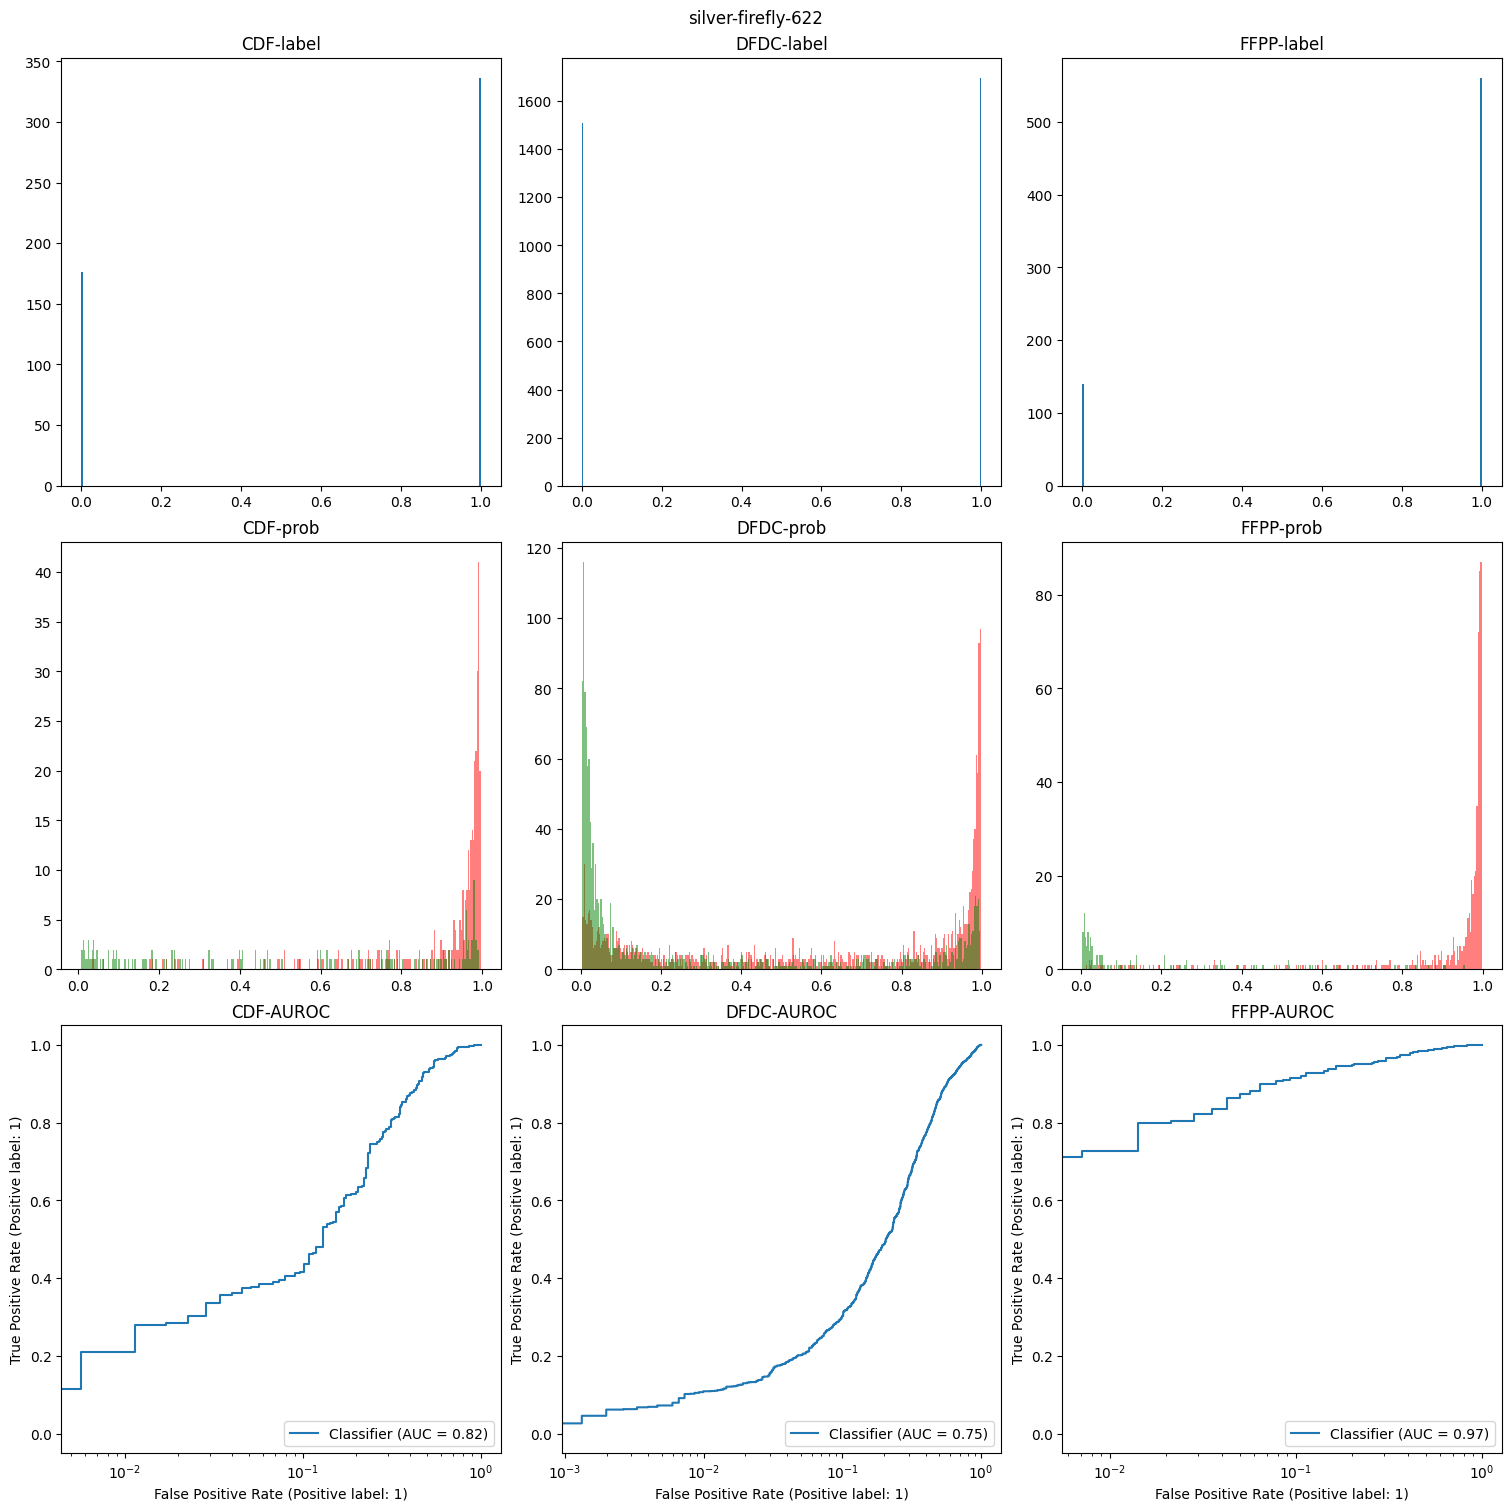

In [1]:
import os
import torch
import pickle
import evaluate
import logging
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn import metrics
logging.basicConfig(level="INFO")
plt.ioff()


def load_and_graph(file):
    with open(file, "rb") as f:
        x = pickle.load(f)
    ##############################################################################
    project_name = file.split("/")[-2]
    graph_path = f"./misc/graphs/statistics/{project_name}.pdf"
    os.makedirs(os.path.split(graph_path)[0], exist_ok=True)
    if (os.path.isfile(graph_path)):
        logging.info(f"\nResult exists in {graph_path}, skipping...")
        return
    ds_names = sorted(list(x.keys()))
    bins = 300
    m_names = list(x[ds_names[0]].keys())
    plt.figure(figsize=(5 * len(ds_names), 5 * (len(m_names) + 1)), layout="constrained")
    plt.suptitle(f'{project_name}', fontsize=12)
    for i, k in enumerate(ds_names):
        # plot stats
        for j, m in enumerate(m_names):
            plt.subplot(len(m_names) + 1, len(ds_names), 1 + len(ds_names) * j + i)
            # plt.gca().set_xscale("log")
            if ("prob" in m):
                plt.hist(
                    [v for i, v in enumerate(x[k][m]) if x[k]["label"][i] == 1],
                    bins=bins, alpha=0.5, color="red"
                )
                plt.hist(
                    [v for i, v in enumerate(x[k][m]) if x[k]["label"][i] == 0],
                    bins=bins, alpha=0.5, color="green"
                )
            else:
                plt.hist(x[k][m], bins=bins)
            plt.title(f"{k}-{m}")
        # plot auroc
        plt.subplot(len(m_names) + 1, len(ds_names),
                    1 + len(ds_names) * len(m_names) + i)
        plt.gca().set_xscale("log")
        metrics.RocCurveDisplay.from_predictions(
            y_true=x[k]["label"], y_pred=x[k]["prob"], ax=plt.gca()
        )
        plt.title(f"{k}-AUROC")
    plt.savefig(graph_path)
    # plt.show()

    ##############################################################################
    # acc = evaluate.load("accuracy")
    # roc = evaluate.load("roc_auc")
    # for k in x.keys():
    #     print(k)
    #     print(acc.compute(predictions=[
    #         1 if i > 0.5 else 0 for i in x[k]["prob"]], references=x[k]["label"]))
    #     print(roc.compute(prediction_scores=x[k]
    #                       ["prob"], references=x[k]["label"]))


for file in tqdm([
    "logs/test/silver-firefly-622/stats_0618T1157_best_video.pickle",
    "logs/test/dauntless-planet-621/stats_0618T0936_best_video.pickle",
    "logs/test/bumbling-sun-620/stats_0618T0521_best_video.pickle",
    "logs/test/absurd-silence-615/stats_0617T1832_best_video.pickle",
    "logs/test/vocal-yogurt-618/stats_0617T2149_best_video.pickle",
    "logs/deepfake/deepfake/AVID(l0246810-11,-adapt)+wgp/stats_0611T0603_best_video.pickle",
    "logs/deepfake/deepfake/AVID(-adapt,tune_all)+frame_attn/stats_0615T1224_best_video.pickle",
    "logs/deepfake/deepfake/AVID(tune_all)+frame_attn/stats_0615T1023_best_video.pickle",
    "logs/deepfake/deepfake/AVID+frame_attn/stats_0614T1155_best_video.pickle",
    "logs/test/neat-grass-612/stats_0615T2235_best_video.pickle",
    "logs/test/pleasant-waterfall-552/stats_0607T0117_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal+3e-3+4s20f+reg_vien(hf,s,pfa-s)+last6+SGD(0.9m)+tune_all/stats_0522T0633_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien(hf,s,pfa-s)+last6+SGD(0.9m)+temporal(conv_z0,v_only)+bs20/stats_0604T1346_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien(hf,s,pfa-s)+last6+SGD(0.9m)+temporal(conv,v_only)-adapt/stats_0603T0900_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien(hf,s,pfa-s)+last6+SGD(0.9m)+tune_all+patch_mask(0.4,batch)/stats_0604T1616_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien_v2(hf,s,pfa-s)+last6+SGD(0.9m)/stats_0530T1602_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal+3e-3+4s20f+reg_vien_v2(hf,s,pfa-s)+last6+SGD(0.9m)+temporal(diff,v_only)/stats_0530T0416_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal+3e-3+4s20f+reg_vien_v2(hf,s,pfa-s)+last6+SGD(0.9m)+temporal(ema_s8r7,v_only)/stats_0530T0842_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien(hf,s,pfa-s,elastic(6))+last6+SGD(0.9m)+smooth(0.05)+z0v1+multi_query/stats_0603T0520_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal+3e-3+4s20f+reg_vien(hf,s,pfa-s)+last6+SGD(0.9m)/stats_0521T0951_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien(hf,s,pfa-s)+last6+SGD(0.9m)+smooth(0.1)/stats_0601T1312_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien(hf,s,pfa-s)+last6+SGD(0.9m)+hinge(0.5)/stats_0601T1614_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien(hf,s,pfa-s,elastic(10))+last6+SGD(0.9m)/stats_0602T0316_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien(hf,s,pfa-s,elastic(7))+last6+SGD(0.9m)/stats_0601T1827_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+3e-3+4s20f+reg_vien(hf,s,pfa-s)+last6+SGD(0.9m)+smooth(0.1)+z0v1+multi_query/stats_0603T0117_best_video.pickle",
    "logs/deepfake/deepfake/c23+resi+dbal_v2+3e-3+4s20f+reg_vien(hf,s,pfa-s,elastic(8))+last6+SGD(0.9m)+smooth(0.1)+z0v1+multi_query/stats_0603T0323_best_video.pickle"
]):
    try:
        load_and_graph(file)
    except Exception as e:
        logging.error(f"Error for '{file}' -> {e}")